# Bias/Variance trade-off

In this notebook, we'll look at some code snippets we can use to help diagnose which error source we're suffering from.

In [1]:
from __future__ import absolute_import
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# load data
boston = load_boston()

X = pd.DataFrame.from_records(boston.data, columns=boston.feature_names)
y = boston.target

# create train/val splits
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
423,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28


## Learning Curves

Define a function for learning curves

In [5]:
def fit_and_plot(train_x, train_y, val_x, val_y, estimator, m_sizes, 
                 scoring, random_state):
    # store the errors
    train_j = []
    val_j = []
    
    for m in m_sizes:
        # we can exploit the train_test_split function
        n_samples = train_x.shape[0] - int(m)
        train, _, labels, _ = train_test_split(train_x, train_y, test_size=n_samples, 
                                               random_state=random_state)
        
        # fit and score
        estimator.fit(train, labels)
        train_j.append(scoring(estimator.predict(train), labels))
        val_j.append(scoring(estimator.predict(val_x), val_y))
        
    # arg sort by M
    order = np.argsort(m_sizes)
    m = np.array(m_sizes)[order]
    train_j = np.array(train_j)[order]
    val_j = np.array(val_j)[order]
    
    # plot learning curve
    fig, ax = plt.subplots()
    ax.plot(m , train_j, c='orange', label='train')
    ax.plot(m , val_j, c='blue', label='test')
    plt.xlabel('m (training set size)')
    plt.ylabel('error')
    
    # Now add the legend with some customizations.
    legend = ax.legend(loc='upper right', shadow=False)

    # The frame is matplotlib.patches.Rectangle instance surrounding the legend.
    frame = legend.get_frame()
    frame.set_facecolor('0.90')
    plt.show()

### Set our `m` range

In [47]:
m_sizes = np.linspace(25, 325, 5).astype(int)
m_sizes

array([ 25, 100, 175, 250, 325])

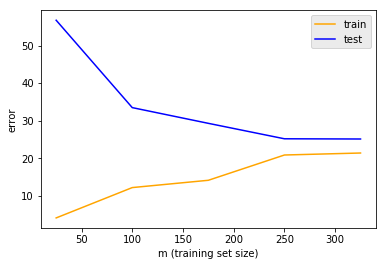

In [49]:
from sklearn.linear_model import LinearRegression

fit_and_plot(X_train, y_train, X_val, y_val,
             LinearRegression(),
             m_sizes=m_sizes, scoring=mean_squared_error, 
             random_state=42)

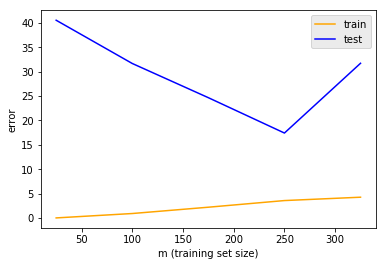

In [48]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

fit_and_plot(X_train, y_train, X_val, y_val,
             DecisionTreeRegressor(max_depth=6, random_state=42),
             m_sizes=m_sizes, scoring=mean_squared_error, 
             random_state=42)